In [ ]:
import numpy as np

date = "mother_folder"
dl_folder = f"base_path/{date}_DL"

dl_number = "project_name"

look_frame = 30
models = 5

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif_time(data: np.ndarray) -> np.ndarray:

    n, T, R = data.shape
    vif_array = np.zeros((T, R), dtype=float)

    for t in range(T):
        df = pd.DataFrame(
            data[:, t, :],
            columns=[f"region_{i}" for i in range(R)]
        )

        vif_array[t, :] = [
            variance_inflation_factor(df.values, i)
            for i in range(R)
        ]

    return vif_array

In [ ]:
import tqdm
import numpy as np
import os

vif_array = []
min_vif = []
max_vif = []
ave_vif = []
for n in tqdm.tqdm(range(5)):
    model_dir = os.path.join(os.path.join(dl_folder, f"model_{dl_number}"), f"model_{n}")

    input_train = np.load(f"{model_dir}/{date}_{dl_number}_train_features.npy")

    vif_array_2d = compute_vif_time(input_train)
    vif_array.append(vif_array_2d)
    min_vif.append(min(vif_array_2d.reshape(-1)))
    max_vif.append(max(vif_array_2d.reshape(-1)))
    ave_vif.append(np.mean(vif_array_2d.reshape(-1)))

vif_array = np.array(vif_array)
min_vif = np.array(min_vif)
max_vif = np.array(max_vif)
ave_vif = np.array(ave_vif)

print(vif_array.shape, max_vif.shape)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

(5, 31, 10) (5,)


In [4]:
np.save((f"{dl_folder}/model_{dl_number}/{date}_{dl_number}_max_vif.npy"), max_vif)

In [ ]:
# set time frames

fs = 20

# start time
start_value = -1.5

# increase per frames
increment = 1/fs

# frames
count = look_frame+1

t = [start_value + i * increment for i in range(count)]

In [5]:
roi_number = []
for ic in range(vif_array_2d.shape[1]):
    roi_number.append(f"IC{ic+1}")

print(roi_number)

['IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10']


In [6]:
mean_vif_array = np.mean(vif_array, axis=0)
print(mean_vif_array.shape)

(31, 10)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def vif_show(vif_array):
    plt.figure(figsize=(6, 6))
    sns.heatmap(vif_array.transpose(), cmap='vlag', vmin=0, vmax=20)
    #sns.heatmap(vif_array.transpose(), cmap='vlag')
    ticks = np.arange(0.5, look_frame + 1.0, 5)
        # 同じ数のラベルを作る
    labels = np.linspace(start_value, 0, len(ticks))
    plt.xticks(ticks, labels, rotation=0)
    plt.yticks( np.arange(0.5, mean_vif_array.shape[1]+0.5), roi_number, rotation=0)
    plt.axvspan(30.45, 30.55, color='black', alpha=1)
    plt.title("VIF")
    plt.xlabel("Time (sec)")
    plt.ylabel("IC #")
    plt.show()

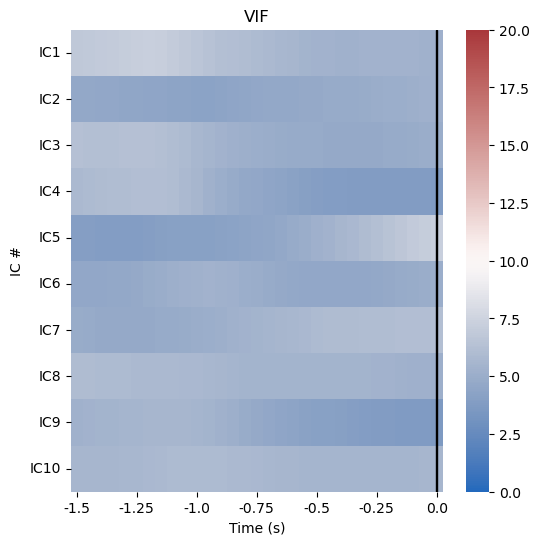

In [12]:
vif_show(mean_vif_array)

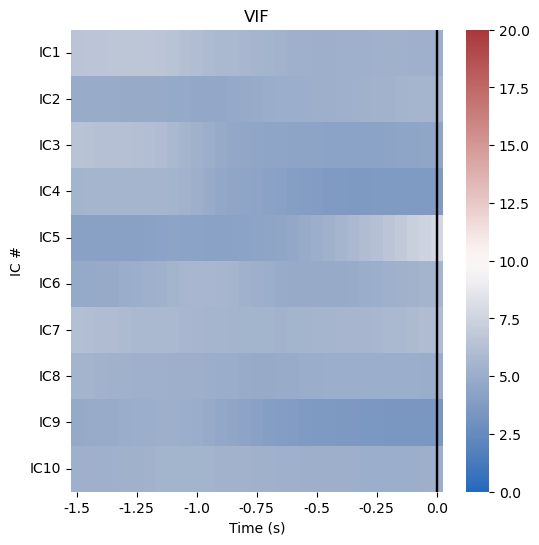

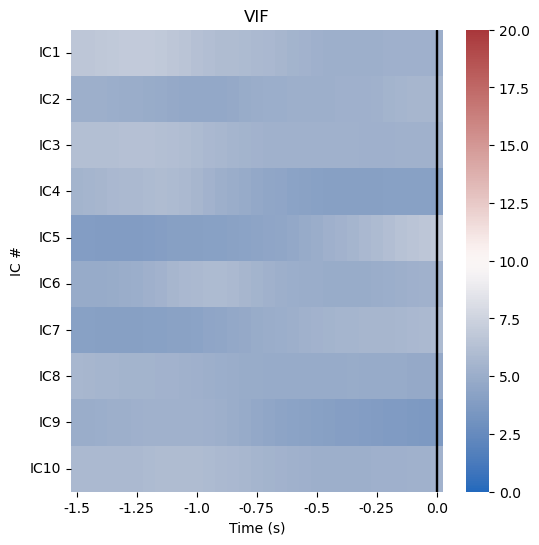

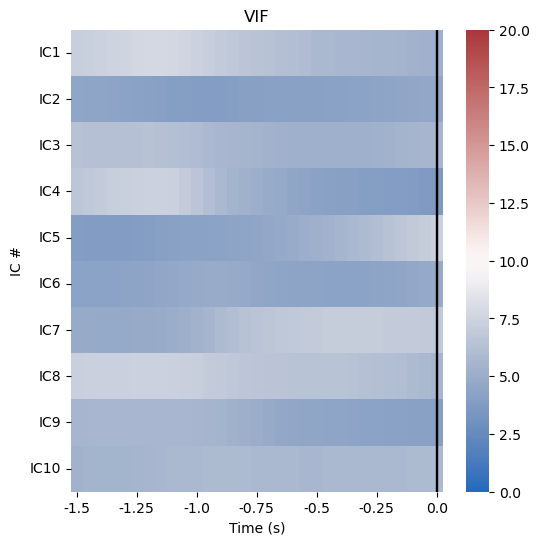

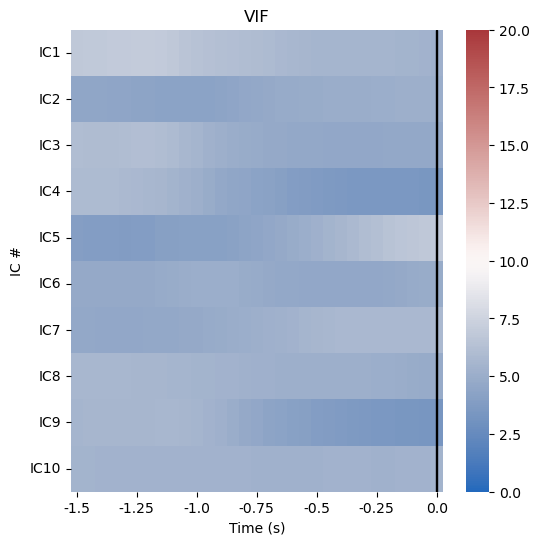

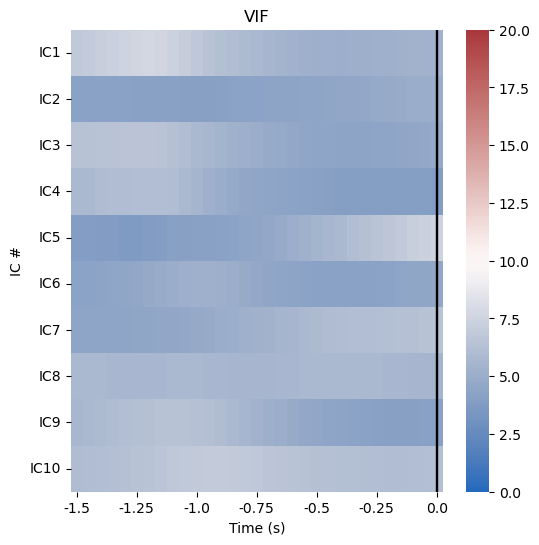

In [13]:
for model in range(vif_array.shape[0]):
    vif_show(vif_array[model])

In [10]:
print(min(min_vif))
print(max(max_vif))
print(np.mean(ave_vif))

3.2910960197318055
7.771826161074432
5.195414713163281
